In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

# Reading the traina and test data from the txt file
X_train = pd.read_csv('Dataset/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
Y_train = pd.read_csv('Dataset/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
X_test = pd.read_csv('Dataset/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)
Y_test = pd.read_csv('Dataset/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

Y_train = Y_train.squeeze()
Y_test = Y_test.squeeze()

In [2]:
print("X_train shape = %s, Y_train shape= %s "%(X_train.shape, Y_train.shape))
print("X_test shape = %s, Y_test shape= %s "%(X_test.shape, Y_test.shape))

X_train shape = (7352, 561), Y_train shape= (7352,) 
X_test shape = (2947, 561), Y_test shape= (2947,) 


In [27]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=150)
pca.fit(X_train)

PCA(n_components=150)

In [28]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [43]:
%%time
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(400, 350, 350, 375, 325, 373), 
                    random_state=1, max_iter = 2000, activation='relu')
mlp.fit(X_train_pca, Y_train)

CPU times: user 1min 47s, sys: 11.1 s, total: 1min 58s
Wall time: 30.2 s


MLPClassifier(hidden_layer_sizes=(400, 350, 350, 375, 325, 373), max_iter=2000,
              random_state=1)

In [44]:
predictions = mlp.predict(X_test_pca)
#getting the accuracy
score = mlp.score(X_test_pca, Y_test)
print(score)

0.9643705463182898


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[493   0   3   0   0   0]
 [ 28 441   1   0   1   0]
 [  3   9 408   0   0   0]
 [  0   2   0 432  57   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


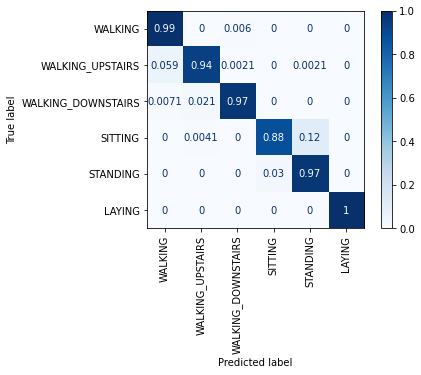

In [38]:
from sklearn.metrics import plot_confusion_matrix
class_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
plot_confusion_matrix(mlp, X_test_pca, Y_test, cmap=plt.cm.Blues,
                                display_labels=class_names, xticks_rotation=90,
                                normalize='true')

## Parameter selection/tuning using Grid search

In [52]:
from sklearn.model_selection import GridSearchCV
gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {'gamma': gammas, 'C': Cs}
gs = GridSearchCV(estimator=svm, param_grid=param_grid, verbose=4, cv=5)


In [53]:
%%time 
gs.fit(X_train, Y_train, )

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .................................C=1, gamma=0.1; total time=   7.2s
[CV 2/5] END .................................C=1, gamma=0.1; total time=   7.9s
[CV 3/5] END .................................C=1, gamma=0.1; total time=   7.9s
[CV 4/5] END .................................C=1, gamma=0.1; total time=   6.8s
[CV 5/5] END .................................C=1, gamma=0.1; total time=   7.4s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   2.1s
[CV 2/5] END ................................C=1, gamma=0.01; total time=   2.0s
[CV 3/5] END ................................C=1, gamma=0.01; total time=   2.2s
[CV 4/5] END ................................C=1, gamma=0.01; total time=   2.1s
[CV 5/5] END ................................C=1, gamma=0.01; total time=   2.1s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   4.1s
[CV 2/5] END ...............................C=1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000.0, 10000.0, 100000.0],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07]},
             verbose=4)

In [54]:
results = pd.DataFrame.from_dict(gs.cv_results_)
scores_matrix = results.pivot(index='param_gamma', columns='param_C',
                                values='mean_test_score')

Text(0, 0.5, 'mean_test_score')

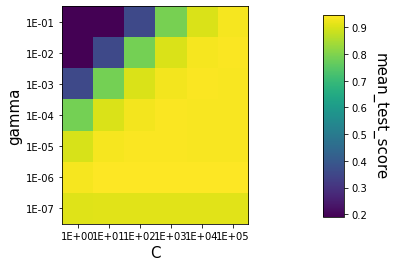

In [55]:
fig, ax = plt.subplots()
im = ax.imshow(scores_matrix)

ax.set_xticks(np.arange(len(Cs)))
ax.set_xticklabels(['{:.0E}'.format(x) for x in Cs])
ax.set_xlabel('C', fontsize=15)

ax.set_yticks(np.arange(len(gammas)))
ax.set_yticklabels(['{:.0E}'.format(x) for x in gammas])
ax.set_ylabel('gamma', fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('mean_test_score', rotation=-90, va="bottom",
                    fontsize=15)

In [56]:
gs.cv_results_['mean_test_score']

array([0.91036992, 0.93498902, 0.90193639, 0.78903953, 0.35691015,
       0.19137641, 0.19137641, 0.91241018, 0.94614372, 0.9347182 ,
       0.90234446, 0.7897198 , 0.35691015, 0.19137641, 0.91241018,
       0.94614363, 0.94070339, 0.9345828 , 0.90234446, 0.78999181,
       0.35691015, 0.91241018, 0.94641565, 0.94070349, 0.94138376,
       0.9345828 , 0.90234446, 0.79039979, 0.91241018, 0.94641565,
       0.93947918, 0.94002303, 0.94083963, 0.93471876, 0.90220841,
       0.91241018, 0.94641565, 0.93947918, 0.93866332, 0.94002312,
       0.9405679 , 0.93485463])

In [57]:
gs.cv_results_['mean_test_score'].max()

0.946415645796048

In [58]:
gs.score(X_test, Y_test)

0.9647098744485918